<a href="https://colab.research.google.com/github/gorkemturkut57/Brain-Tumor-Detection-AI/blob/main/brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# run this to connect to drive
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import zipfile
import os
import random

In [ ]:
# getting zip file from drive for training dataset
zip_path = '/content/drive/MyDrive/Training Data Set.zip'
extract_path = '/content/train_data'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# getting zip file from drive for prediction dataset
zip_path2 = '/content/drive/MyDrive/Prediction Data Set.zip'
extract_path2 = '/content/prediction_data'
with zipfile.ZipFile(zip_path2, 'r') as zip_ref:
    zip_ref.extractall(extract_path2)

In [ ]:
# Set up data path for training dataset
data_path = '/content/train_data/Training Data Set'
brain_tumor_path = data_path + 'Brain Tumor/'
healthy_path = data_path + 'Healthy/'

In [ ]:
# Define image dimensions and batch size
img_width, img_height = 128, 128
batch_size = 32

# Create ImageDataGenerator for data augmentation (Optional)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Create a validation generator (use same preprocessing as training)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3920 images belonging to 2 classes.
Found 3920 images belonging to 2 classes.


In [ ]:
# Define the CNN model
model = Sequential()
# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output for fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax')) # Output layer with 2 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/15
122/122 [==============================] - 28s 190ms/step - loss: 0.5920 - accuracy: 0.6775 - val_loss: 0.4319 - val_accuracy: 0.8125
Epoch 2/15
122/122 [==============================] - 23s 187ms/step - loss: 0.4230 - accuracy: 0.8086 - val_loss: 0.3770 - val_accuracy: 0.8217
Epoch 3/15
122/122 [==============================] - 23s 189ms/step - loss: 0.3562 - accuracy: 0.8434 - val_loss: 0.3078 - val_accuracy: 0.8650
Epoch 4/15
122/122 [==============================] - 23s 187ms/step - loss: 0.2835 - accuracy: 0.8742 - val_loss: 0.1903 - val_accuracy: 0.9290
Epoch 5/15
122/122 [==============================] - 23s 189ms/step - loss: 0.2372 - accuracy: 0.9061 - val_loss: 0.2003 - val_accuracy: 0.9165
Epoch 6/15
122/122 [==============================] - 23s 189ms/step - loss: 0.1849 - accuracy: 0.9280 - val_loss: 0.0971 - val_accuracy: 0.9677
Epoch 7/15
122/122 [==============================] - 23s 186ms/step - loss: 0.1486 - accuracy: 0.9444 - val_loss: 0.0836 - val_ac

122/122 [==============================] - 5s 42ms/step - loss: 0.0356 - accuracy: 0.9885
Test Loss: 0.03561205044388771
Test Accuracy: 0.9884733557701111


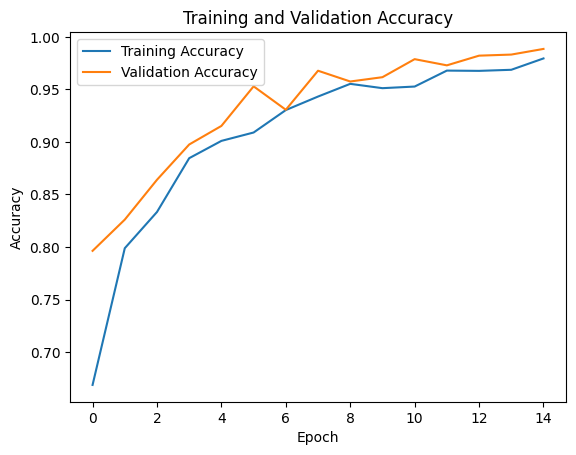

123/123 [==============================] - 5s 43ms/step


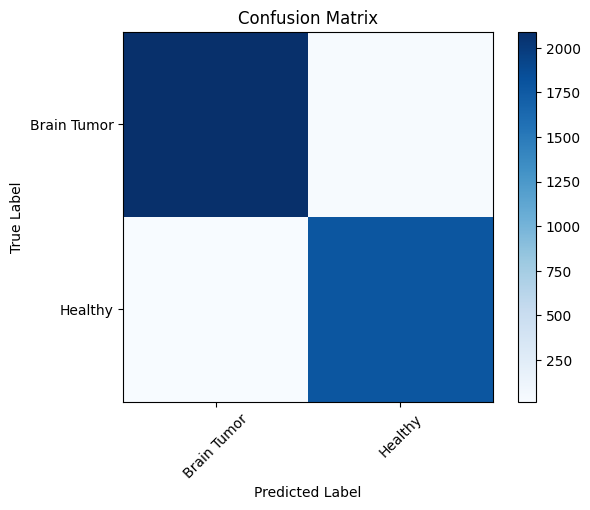

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2120
           1       0.98      0.99      0.99      1800

    accuracy                           0.99      3920
   macro avg       0.99      0.99      0.99      3920
weighted avg       0.99      0.99      0.99      3920



In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot confusion matrix
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = validation_generator.classes
confusion_mat = confusion_matrix(y_true_classes, y_pred_classes)
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(train_generator.class_indices))
plt.xticks(tick_marks, train_generator.class_indices, rotation=45)
plt.yticks(tick_marks, train_generator.class_indices)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_true_classes, y_pred_classes))

In [ ]:
# Save the trained model
model.save('brain_tumor_detection_model.h5')

# Load the saved model
loaded_model = tf.keras.models.load_model('brain_tumor_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def predict_tumor(image_path):
  img = load_img(image_path, target_size=(img_width, img_height))
  x = img_to_array(img)
  x = x / 255.0  # Normalize image
  x = np.expand_dims(x, axis=0)

  prediction = loaded_model.predict(x)
  class_index = np.argmax(prediction[0])

  if class_index == 1:
    return "Healthy"
  else:
    return "Cancer"

In [ ]:
# Random image selection from a folder
def select_random_image(folder_path):
  image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
  random_image = random.choice(image_files)
  return os.path.join(folder_path, random_image)

# Get a random image from a folder
folder_path = '/content/prediction_data/Prediction Data Set' # Klasör yolunu belirtin

# Predict and print the result
count = 0
# Dosya adından gerçek sonucu belirleme
for i in range(100):
  image_path = select_random_image(folder_path)
  prediction = predict_tumor(image_path)

  real_result = "Healthy" if "Not Cancer" in image_path else "Cancer"

  print(f"Dosya Yolu: {image_path}")
  print(f"Gerçek Sonuç: {real_result}")
  print(f"Model Tahmini: {prediction}")
  if(real_result == prediction):
    count+=1
print(f"Doğru Sayısı: {count}/100 tahmin sayısı")

1/1 [==============================] - 0s 270ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Cancer (1798).jpg
Gerçek Sonuç: Cancer
Model Tahmini: Cancer
1/1 [==============================] - 0s 20ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Cancer (1021).jpg
Gerçek Sonuç: Cancer
Model Tahmini: Cancer
1/1 [==============================] - 0s 19ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Cancer (916).jpg
Gerçek Sonuç: Cancer
Model Tahmini: Cancer
1/1 [==============================] - 0s 19ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Cancer (2406).jpg
Gerçek Sonuç: Cancer
Model Tahmini: Cancer
1/1 [==============================] - 0s 20ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Not Cancer  (680).jpg
Gerçek Sonuç: Healthy
Model Tahmini: Healthy
1/1 [==============================] - 0s 19ms/step
Dosya Yolu: /content/prediction_data/Prediction Data Set/Not Cancer  (2037).jpg
Gerçek Sonuç

In [ ]:
# Tümörün yerini görselleştirmek için Grad-CAM kullanma
from tensorflow.keras.models import Model
import cv2

def grad_cam(image_path, model, layer_name):
  img = load_img(image_path, target_size=(img_width, img_height))
  # PIL görüntüsünü NumPy dizisine dönüştürme
  img = np.array(img)

  x = img_to_array(img)
  x = x / 255.0
  x = np.expand_dims(x, axis=0)

  # Model çıkışını ve konvolüsyon katmanı çıkışını alma
  grad_model = Model(inputs=model.inputs, outputs=[model.get_layer(layer_name).output, model.output])
  with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x)
    loss = predictions[:, np.argmax(predictions[0])]
  grads = tape.gradient(loss, conv_outputs)

  # Ortalama gradyanları hesaplama
  cast_conv_outputs = tf.cast(conv_outputs > 0, "float32")
  cast_grads = tf.cast(grads > 0, "float32")
  guided_grads = cast_grads * cast_conv_outputs * grads
  conv_outputs = conv_outputs[0]
  guided_grads = guided_grads[0]
  weights = tf.reduce_mean(guided_grads, axis=(0, 1))
  cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)

  # Isı haritasını oluşturma
  cam = cv2.resize(cam.numpy(), (img_width, img_height))
  cam = np.maximum(cam, 0)
  heatmap = (cam - cam.min()) / (cam.max() - cam.min())
  heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

   # Isı haritasını tersine çevirme
  heatmap = cv2.bitwise_not(heatmap)
  # output_image oluşturmadan önce img'yi RGB'den BGR'ye dönüştürme
  output_image = cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_RGB2BGR), 0.6, heatmap, 0.4, 0)

  return output_image

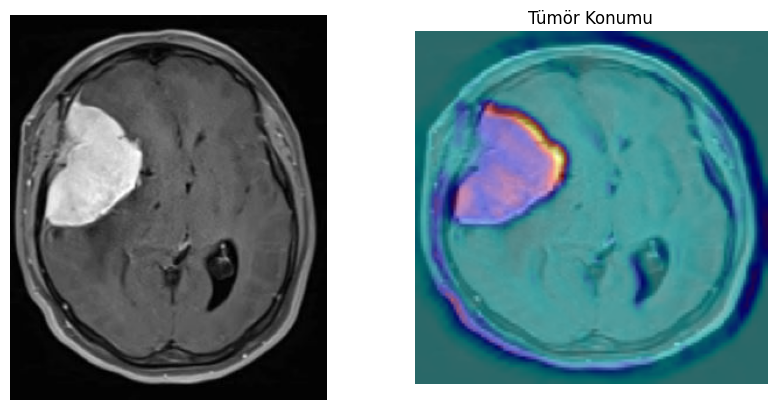

In [ ]:
# Rastgele bir görüntü seçme
image_path = select_random_image('/content/train_data/Training Data Set/Brain Tumor')

# Grad-CAM ile ısı haritasını oluşturma
layer_name = "conv2d_1" #konvolüsyon katmanı girin
heatmap_image = grad_cam(image_path, loaded_model, layer_name)

# Sonuçları ve ısı haritasını görüntüleme
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(load_img(image_path))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(heatmap_image)
plt.title("Tümör Konumu")
plt.axis("off")

plt.show()